# Frequency Domain Filtering

Normally, we think of an image as a rectangular array of pixels, each pixel representing an intensity at a position in the spatial domain. However, some operations are complicated, or impossible to perform in the spatial domain, and; therefore, a different representation is required.

Representing an image as the sum of sinusoidal waves places it in the frequency domain in which certain denoising and smoothing operations on the periodic structure are possible.
We convert an image to a spectrum in the frequency domain via the Fourier transformation (FT) {cite}` fourierAnalyticalTheoryHeat2007. It has two components: **magnitude** and **phase**. The magnitude tells us *how much* a certain frequency component is present, and the phase tells us *where* the frequency component is in the image.

To get some intuition into the frequency domain representation, we plot a few the Fourier transformation of a few simple images. In general, we plot the *magnitude* images and **not** the *phase* images [^phase].

[^phase]: The case reports of people who have studied phase images shortly thereafter succumbing to hallucinogenics or ending up in a Tibetan monastery {cite}`IntroductionFourierTransform`  have not been corroborated. Nonetheless, the study of phase images in the frequency domain is best avoided.

NameError: name 'glue' is not defined

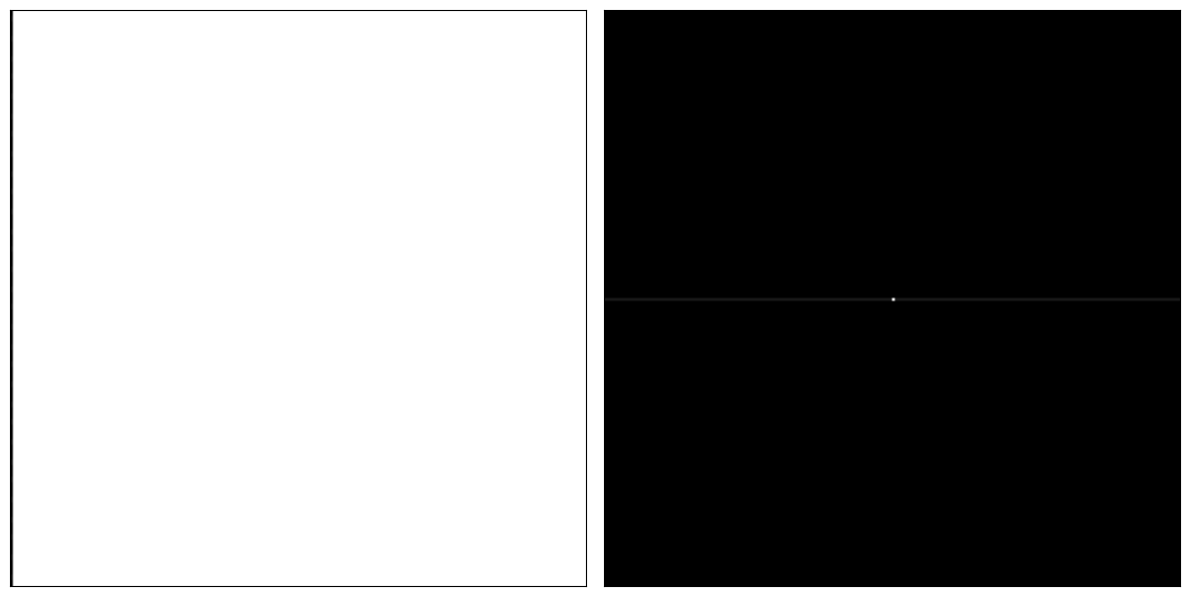

In [1]:
import os
if 'jbook' in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../../../..")))
import cv2
import matplotlib.pyplot as plt
import numpy as np
from bcd.utils.image import convert_uint8

FP_WHITE = "jbook/figures/frequency_white.jpg"
FP_HLINE = "jbook/figures/frequency_hline.png"
FP_VLINE = "jbook/figures/frequency_vline.png"

def get_image(fp: str, size: int = 200):
    img = cv2.imread(fp, cv2.IMREAD_GRAYSCALE)
    return cv2.resize(img, (size,size))

def transform_image(img):
    # Compute fourier transformation
    img_fft = np.fft.fft2(img)
    # Shift the zero-frequency to the center
    img_shifted = np.fft.fftshift(img_fft)
    # Compute amplitude
    img_amp = np.abs(img_shifted)
    img_amp = np.clip(img_amp, a_min=0, a_max=50000)
    return img_amp

def plot_images(img1, img2, size=(12,6)):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=size)
    _ = axes[0].imshow(img1, cmap='gray')
    _ = axes[1].imshow(img2, cmap='gray')

    for i in range(2):
        _ = axes[i].set_xticks([])
        _ = axes[i].set_yticks([])
    plt.tight_layout()
    return fig

# obtain the original images
img = get_image(fp=FP_WHITE)
img_fft = transform_image(img)
fig = plot_images(img1=img,img2=img_fft)
glue("fft_uniform", fig)

```{glue:figure} fft_uniform
---
align: center
name: fft_uniform_fig
---
Fourier Transformation of a White Background
```

In {numref}`fft_uniform_fig` we see a constant white image on the left along with its frequency spectrum image on the right. The white dot we see in the center of the  frequency domain